# Multi-Class Prediction of Obesity Risk

## Table of Contents

1. [Introduction](#Intro)
1. [Import Libraries](#Lib)
1. [Load Data](#Load)
1. [EDA - Univariate](#Uni)
1. [EDA - Multivariate](#Multi)
1. [Feature Engineering](#FE)
1. [Model Building](#model)
    1. [Baseline Model](#baseline)
    1. [Hyperparameter Tuning](#tuning)
1. [Submission](#submit)

<a id='Intro'></a>

### Introduction

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)
variables obtained :
Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format.

<a id='Lib'></a>

### Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

%matplotlib inline
plt.rcParams.update({'font.family':'Constantia', 'font.serif':['Constantia']})
plt.rcParams.update({'pdf.fonttype': 'truetype', 'font.size': 18})

<a id='Load'></a>

### Load the Data

In [23]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
original = pd.read_csv('data/ObesityDataSet.csv')

train.drop('id',axis=1,inplace=True)

In [24]:
train = pd.concat([train,original]).drop_duplicates()

In [27]:
train.shape, test.shape

((22845, 17), (13840, 17))

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22845 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22845 non-null  object 
 1   Age                             22845 non-null  float64
 2   Height                          22845 non-null  float64
 3   Weight                          22845 non-null  float64
 4   family_history_with_overweight  22845 non-null  object 
 5   FAVC                            22845 non-null  object 
 6   FCVC                            22845 non-null  float64
 7   NCP                             22845 non-null  float64
 8   CAEC                            22845 non-null  object 
 9   SMOKE                           22845 non-null  object 
 10  CH2O                            22845 non-null  float64
 11  SCC                             22845 non-null  object 
 12  FAF                             2

In [30]:
categorical = [var for var in train.columns if train[var].dtype == 'object' and var !='NObeyesdad']
numerical = [var for var in train.columns if train[var].dtype != 'object' and var !='NObeyesdad']
target = 'NObeyesdad'

print(f'There are {len(categorical)} categorical variables')
print(categorical)
print('\n')
print(f'There are {len(numerical)} numerical variables')
print(numerical)

There are 8 categorical variables
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


There are 8 numerical variables
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


<a id='Uni'></a>

### EDA - Univariate Analysis

#### Categorical variables

Female    0.50151
Male      0.49849
Name: Gender, dtype: float64


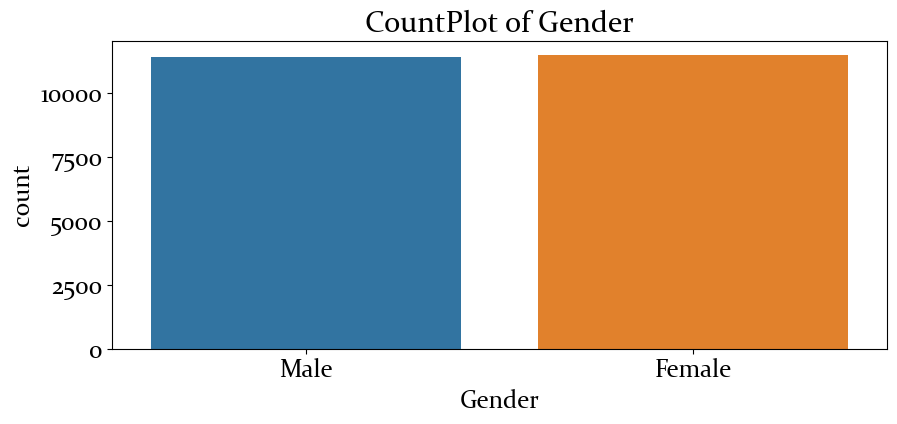



yes    0.820136
no     0.179864
Name: family_history_with_overweight, dtype: float64


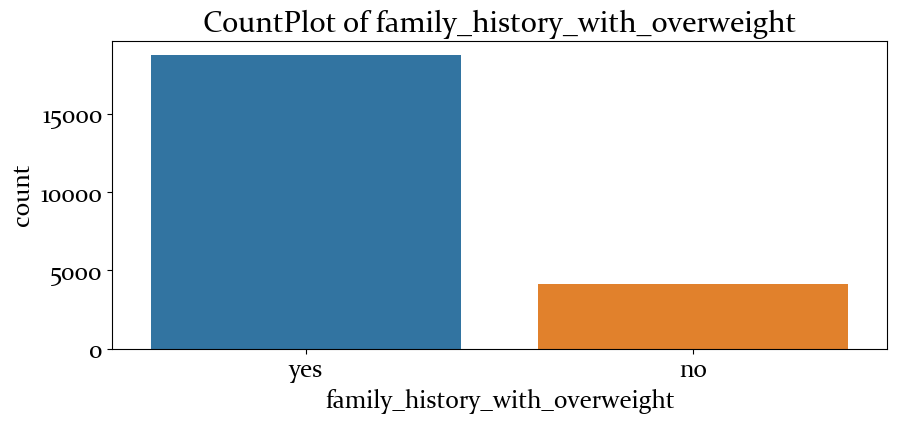



yes    0.911622
no     0.088378
Name: FAVC, dtype: float64


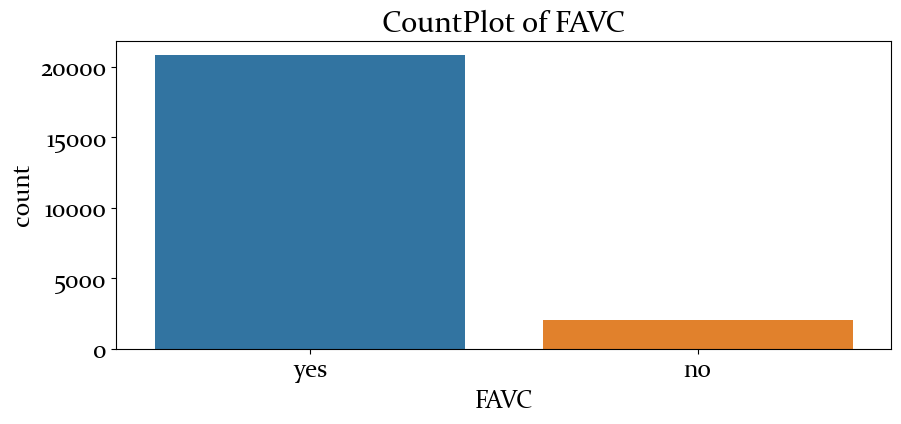



Sometimes     0.844386
Frequently    0.118538
Always        0.023244
no            0.013832
Name: CAEC, dtype: float64


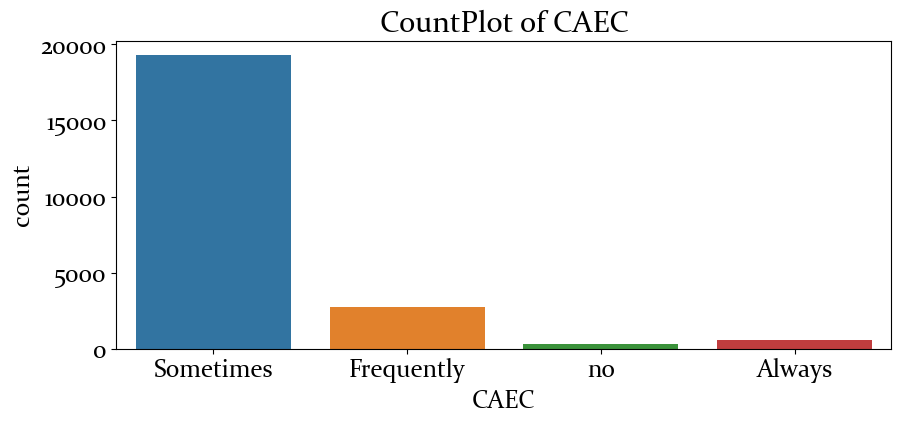



no     0.98735
yes    0.01265
Name: SMOKE, dtype: float64


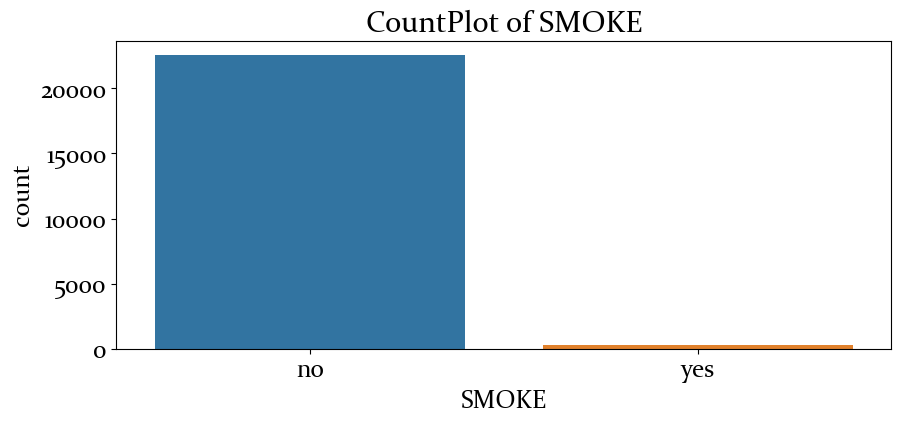



no     0.965726
yes    0.034274
Name: SCC, dtype: float64


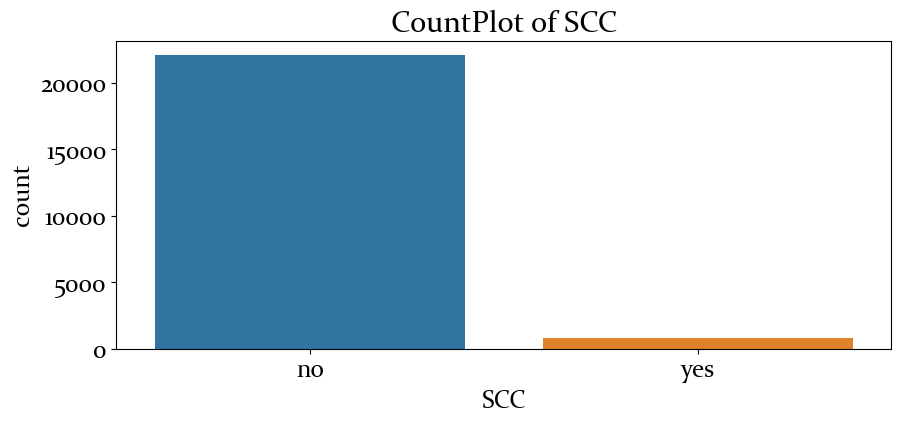



Sometimes     0.719895
no            0.253841
Frequently    0.026220
Always        0.000044
Name: CALC, dtype: float64


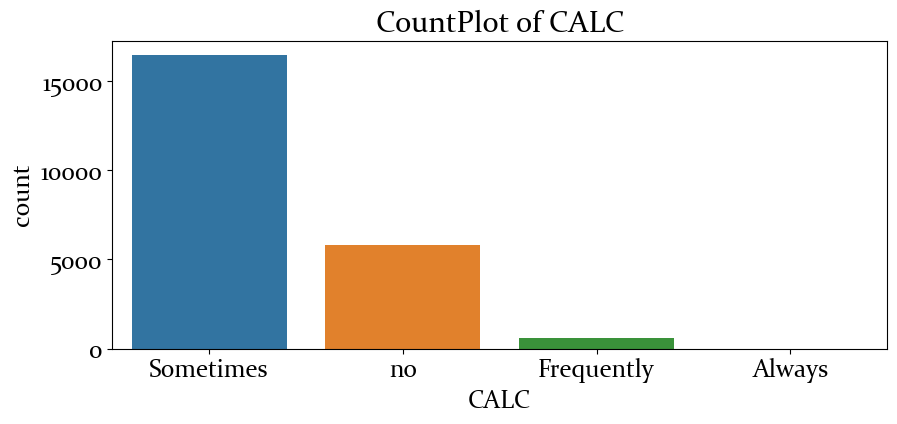



Public_Transportation    0.798643
Automobile               0.174655
Walking                  0.022850
Motorbike                0.002145
Bike                     0.001707
Name: MTRANS, dtype: float64


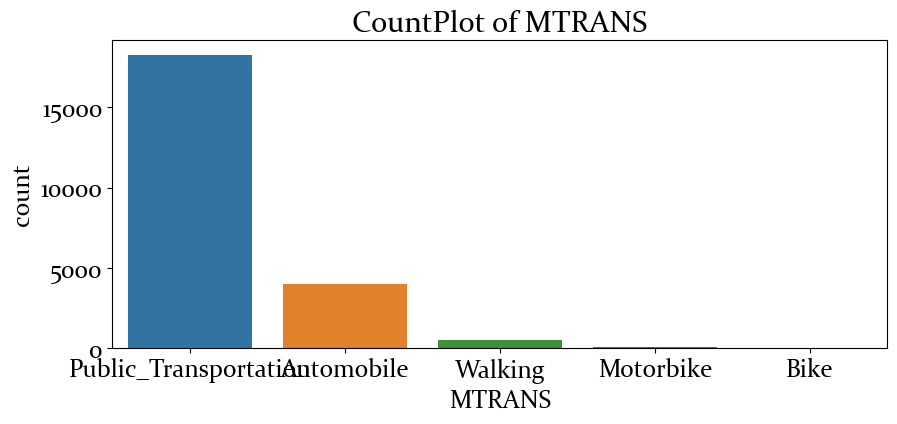

In [31]:
for var in categorical:
    plt.figure(figsize=(10,4))
    print(train[var].value_counts(normalize=True))
    fig = sns.countplot(data=train,x=var)
    fig.set_title(f'CountPlot of {var}')
    plt.show()
    print('\n')
    

#### Important Observations on Univariate Analysis of Categorical Variables

> Except for the gender variable, other categorical varibales are unevenly distributed.

> Gender - There are equal class disctributions of Male and Female in the dataset. It seems to say that both the genders are equally affected by Obesity.

> family_history_with_overweight - The 'yes' category highly overweighs the 'no' category. There can be a clear conclusion made that family history with Obesity can affect and can have a significant impact.

> Frequent consumption of high caloric food (FAVC) - The 'yes' category highly overweighs the 'no' category. There shouldn't be any surprise that the high calorific intake can lead to obesity.

> Consumption of food between meals (CAEC) - Sometimes category has the highest occurence followed by Frequent. There cannot be any clear decision that can be established by this plot.

> Consumption of alcohol (CALC) - 72% of the people consume alcohol and only 2% consume on a frequent basis.

> Calories consumption monitoring (SCC) - 96% of the people dont monitor or count their calories consumption. 

> Transportation used (MTRANS) - 80% of the people use public transport, since this is more of a economic and a personal preference, more analysis needed to conclude.

>SMOKE - 98% of the persons in the dataset dont smoke. It can be said that Smoke may not affect obesity.

#### Numerical variables

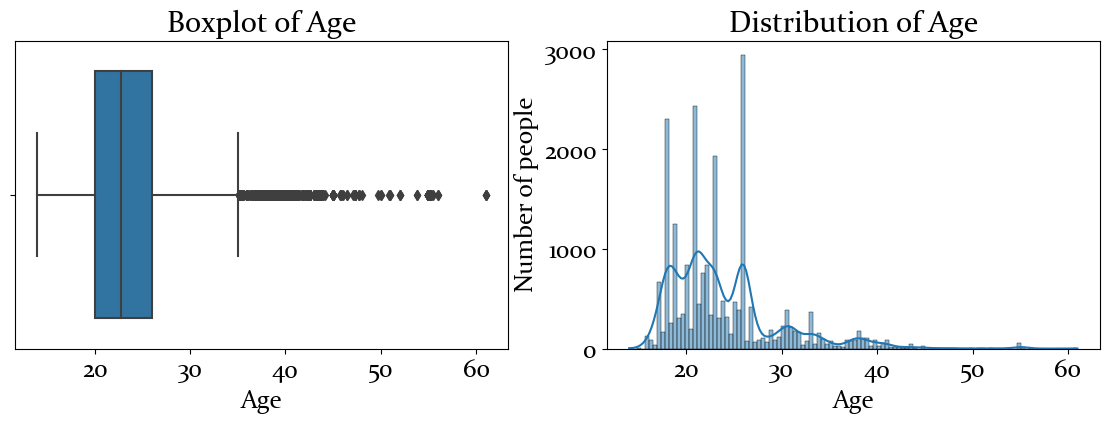

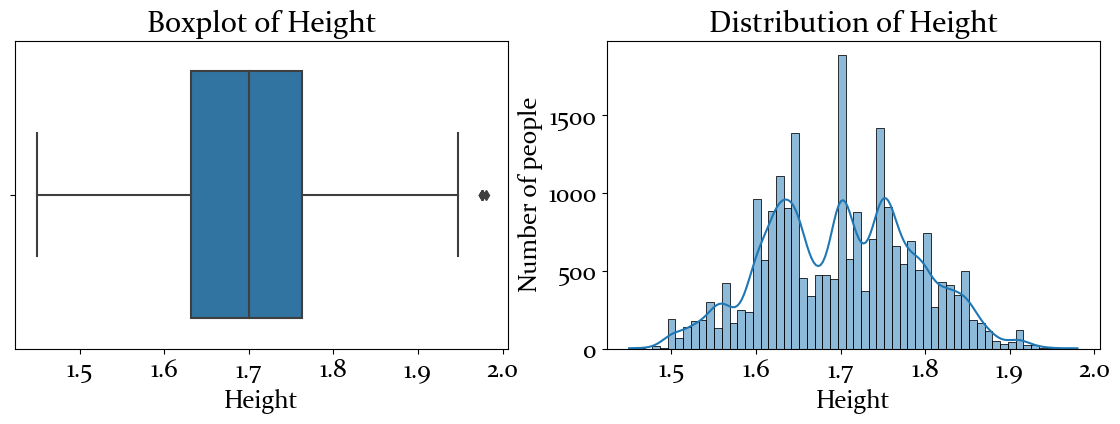

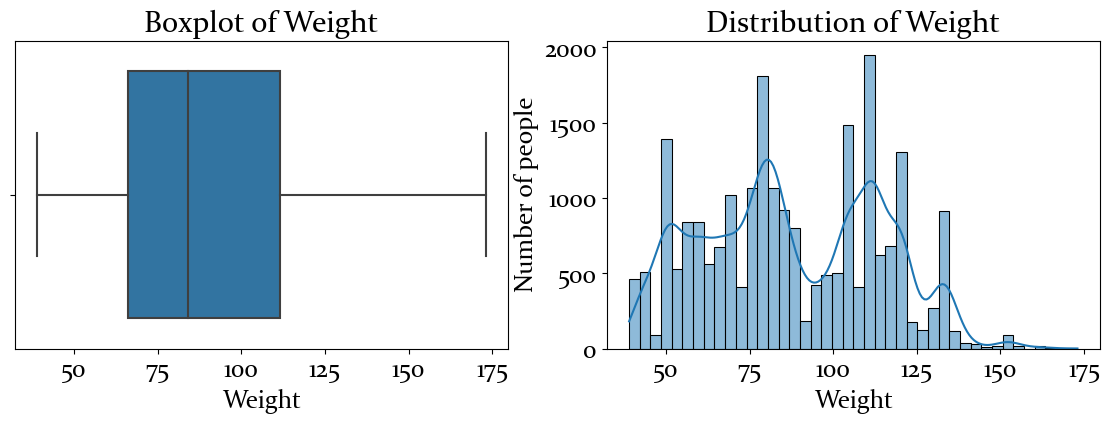

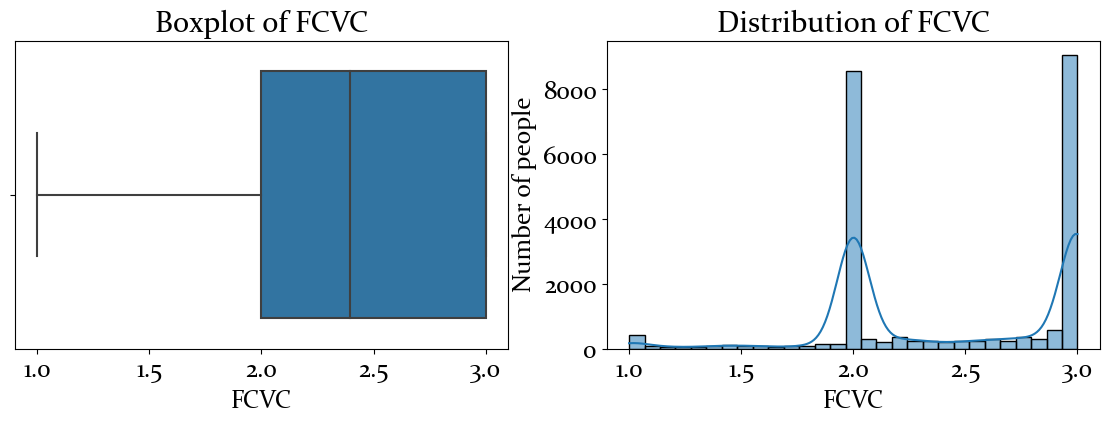

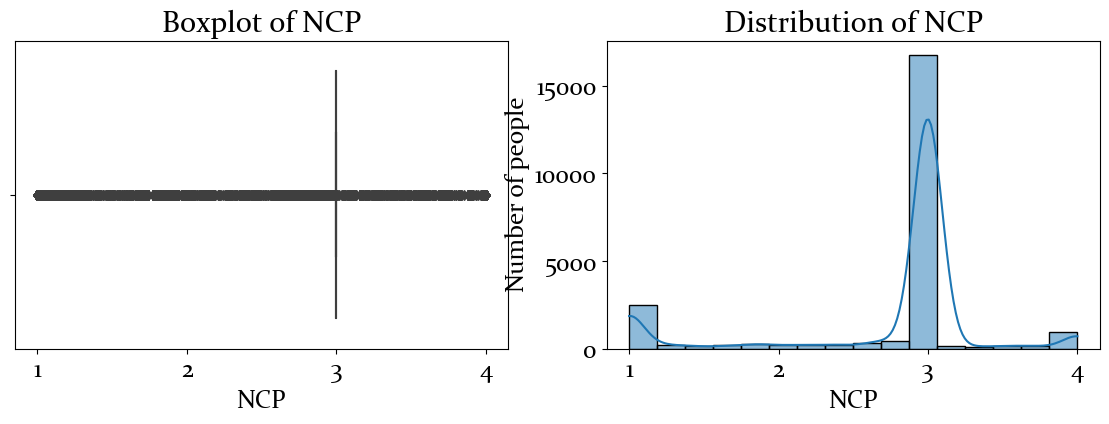

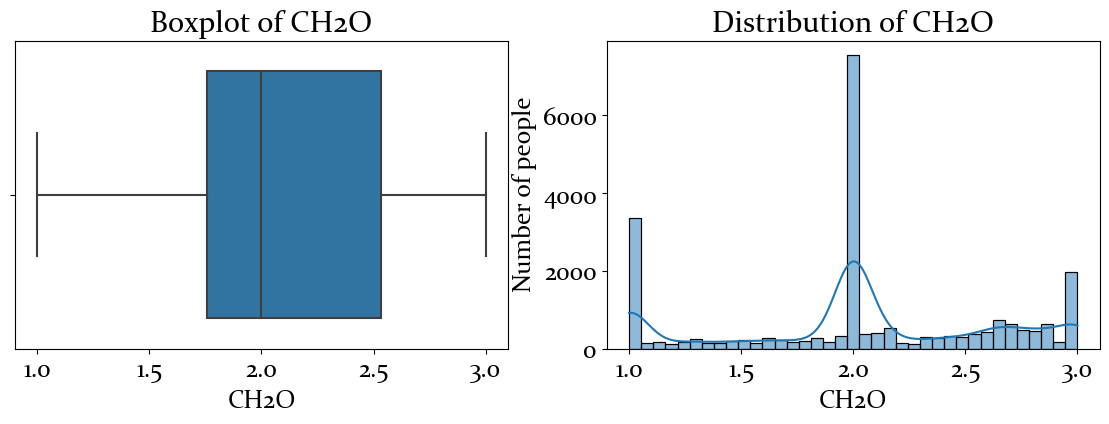

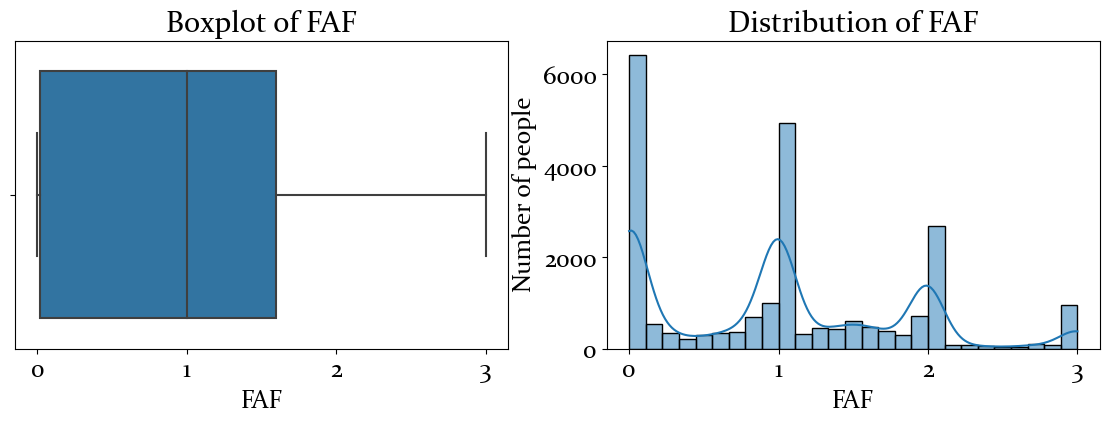

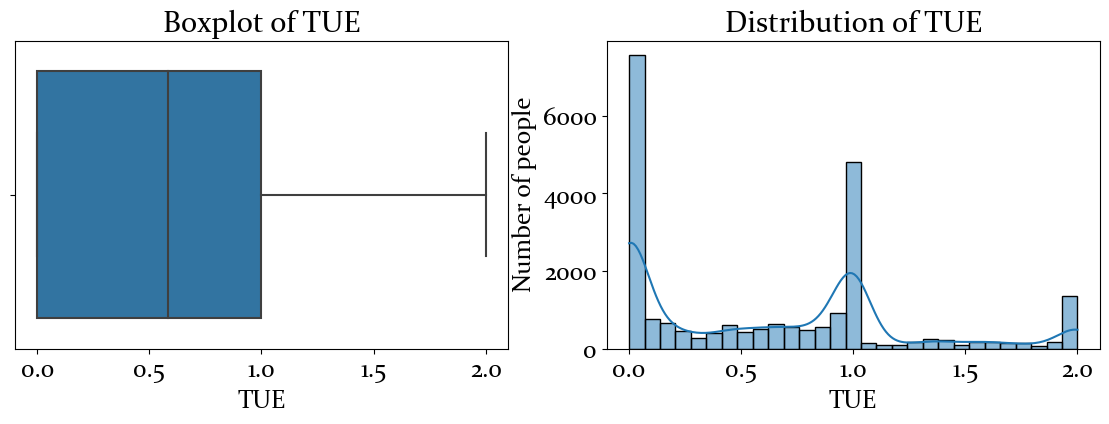

In [33]:
for var in numerical:
    plt.figure(figsize=(14,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(data=train,x = var)
    fig.set_title(f'Boxplot of {var}')
    
    plt.subplot(1, 2, 2)
    fig = sns.histplot(data=train,x = var,kde=True)
    fig.set_ylabel('Number of people')
    fig.set_xlabel(var)
    fig.set_title(f'Distribution of {var}')

    plt.show()

#### Important Observations on Univariate Analysis of Numerical Variables

> Age column has around half of the data in the range of 20-30 with lots of outliers at the right end.
the distribution is highly skewed towards the right.

> Height and Weight are  somewhat(not entirely) normally distributed with very few outliers. Weight new features like obses and not obese.

> NCP - Number of main meals - Majority of the people have 3 main meals with few people having either 1 or 4.

> Consumption of water daily (CH20) - WHO recommends around 3 litres consumption and here in the data we
have most of the people consumption around 2-2.5 litres.

> Physical activity frequency (FAF) - Most people do little to no excercise as per the distribution on the boxplot.

> Time using technology devices (TUE) - Most people spend little to no time as per the distribution on the boxplot. 


#### Target variable

Obesity_Type_III       0.191289
Obesity_Type_II        0.155176
Normal_Weight          0.147253
Obesity_Type_I         0.142745
Overweight_Level_II    0.123090
Insufficient_Weight    0.122127
Overweight_Level_I     0.118319
Name: NObeyesdad, dtype: float64


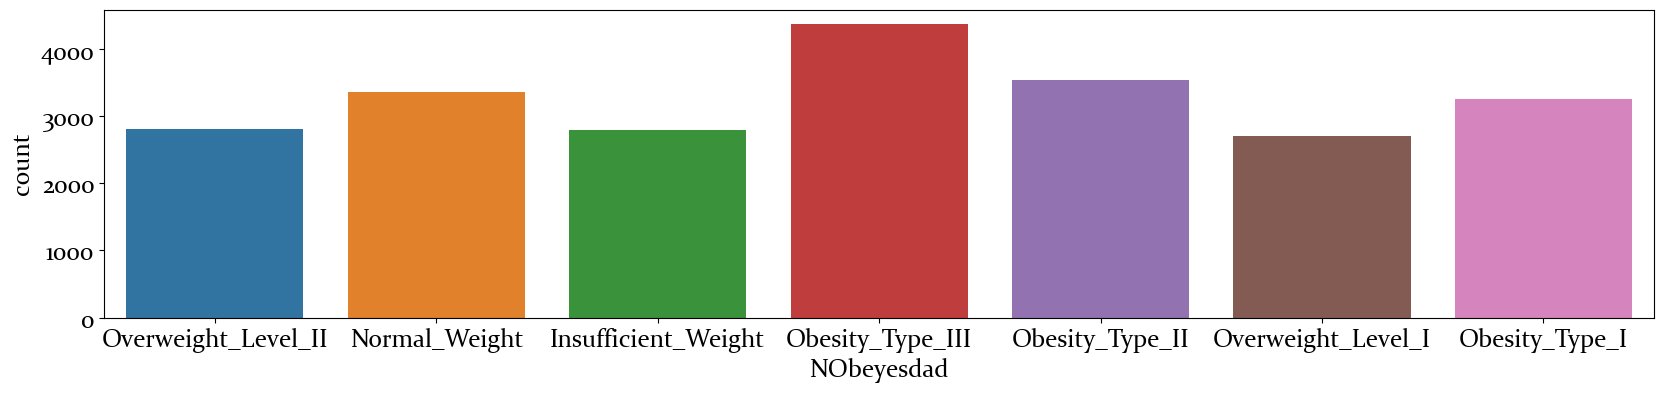

In [34]:
plt.figure(figsize=(20,4))
print(train[target].value_counts(normalize=True))
sns.countplot(data=train,x=target)
plt.show()

Target classes are almost equally distributed with Obesity_type_III as the most frequent class

Multivariate Analysis

Numerical vs numerical

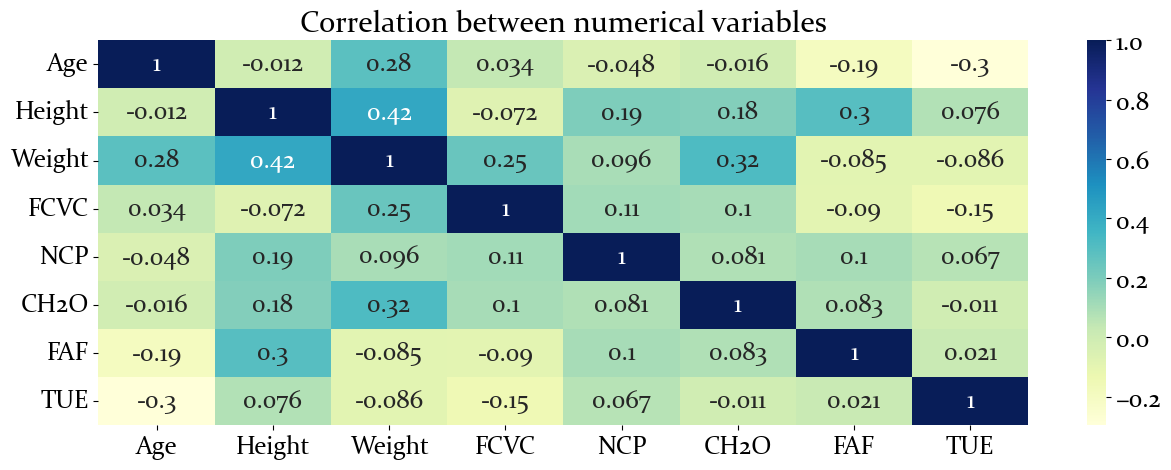

In [9]:
plt.figure(figsize=(15,5))
fig = sns.heatmap(train[numerical].corr(), cmap="YlGnBu", annot=True)
fig.set_title("Correlation between numerical variables")
plt.show()

No clear correlation between any of the numerical variables

Numerical vs target

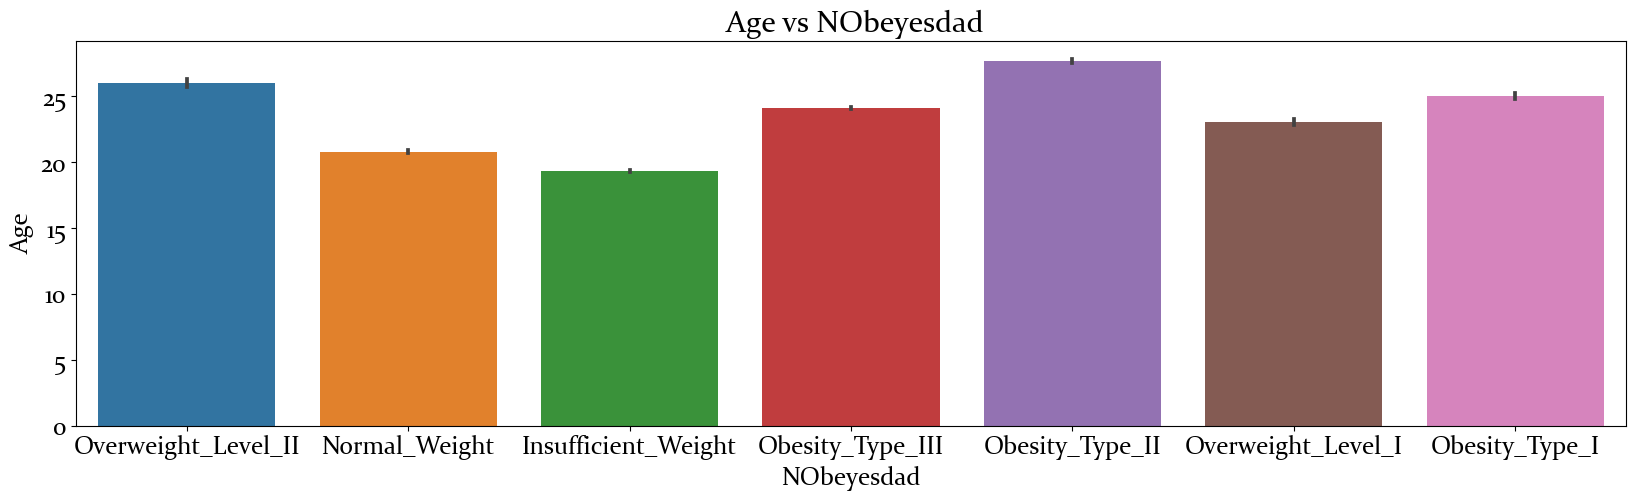

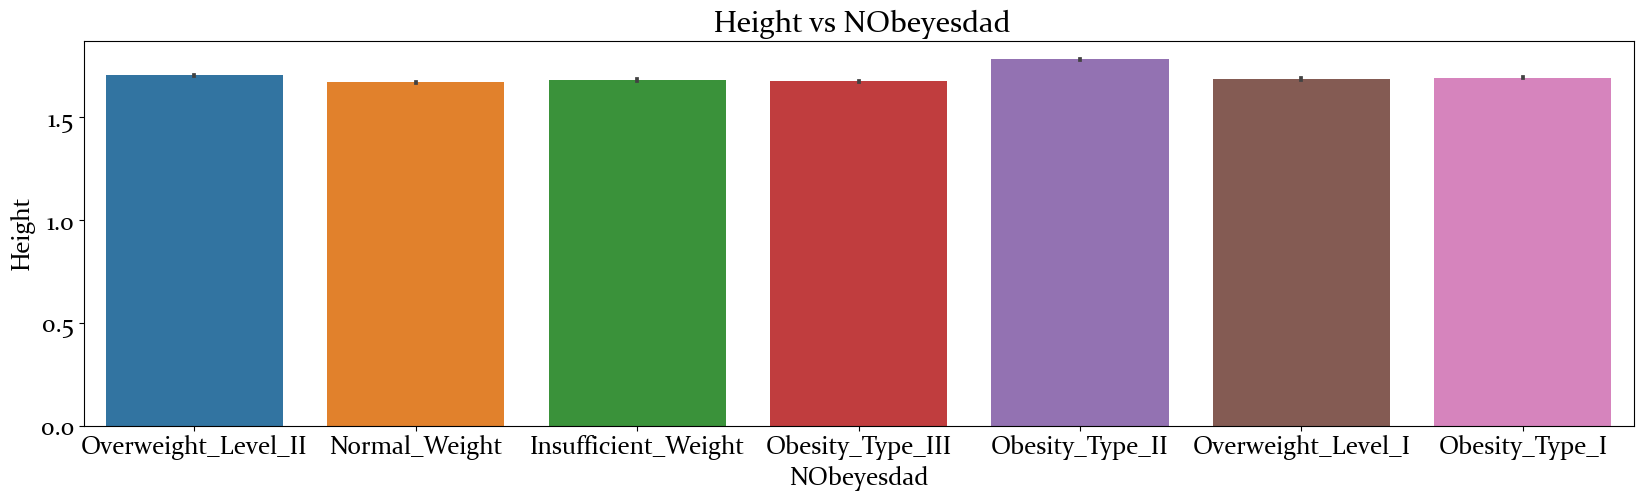

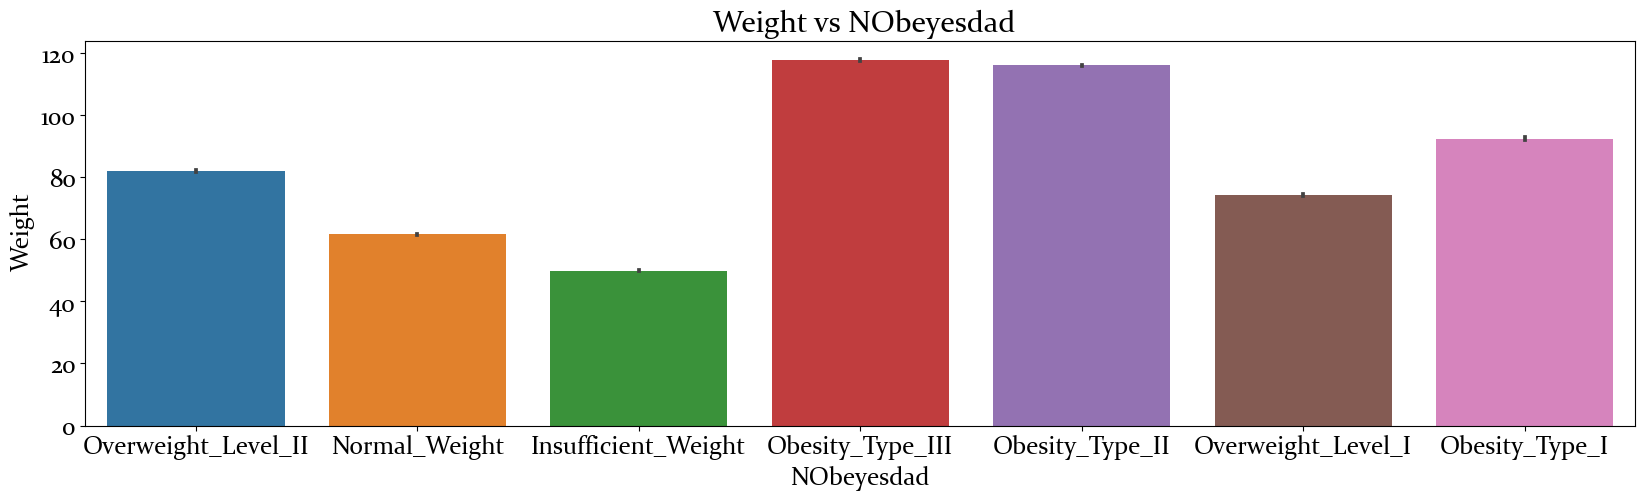

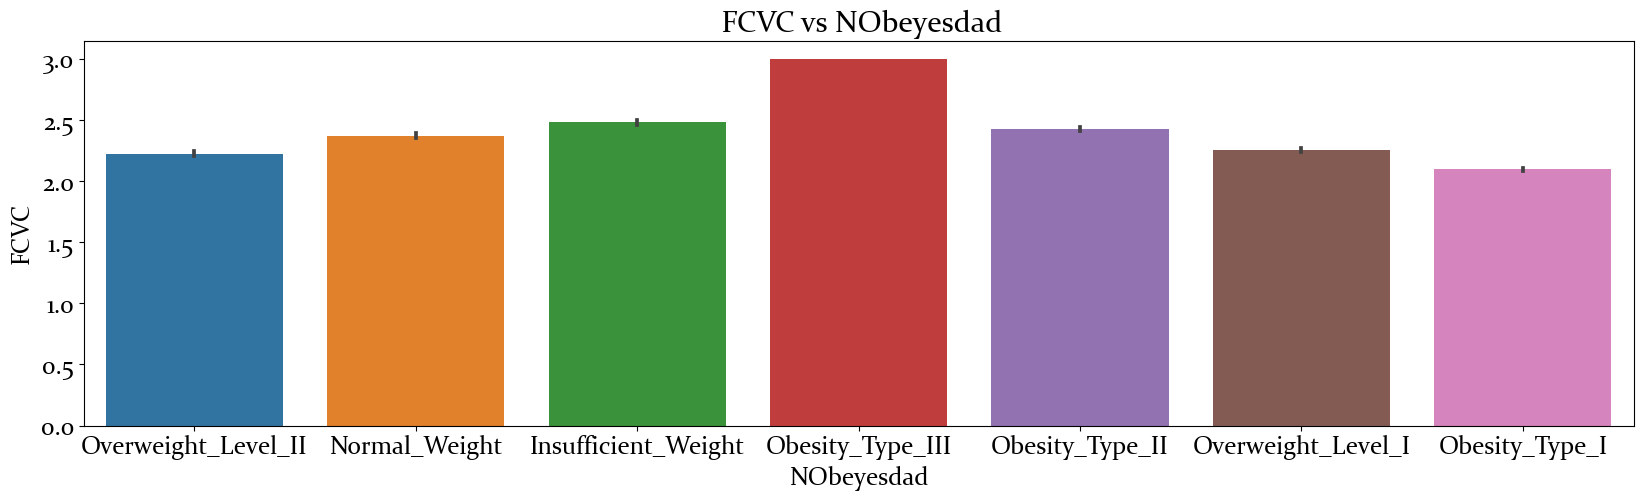

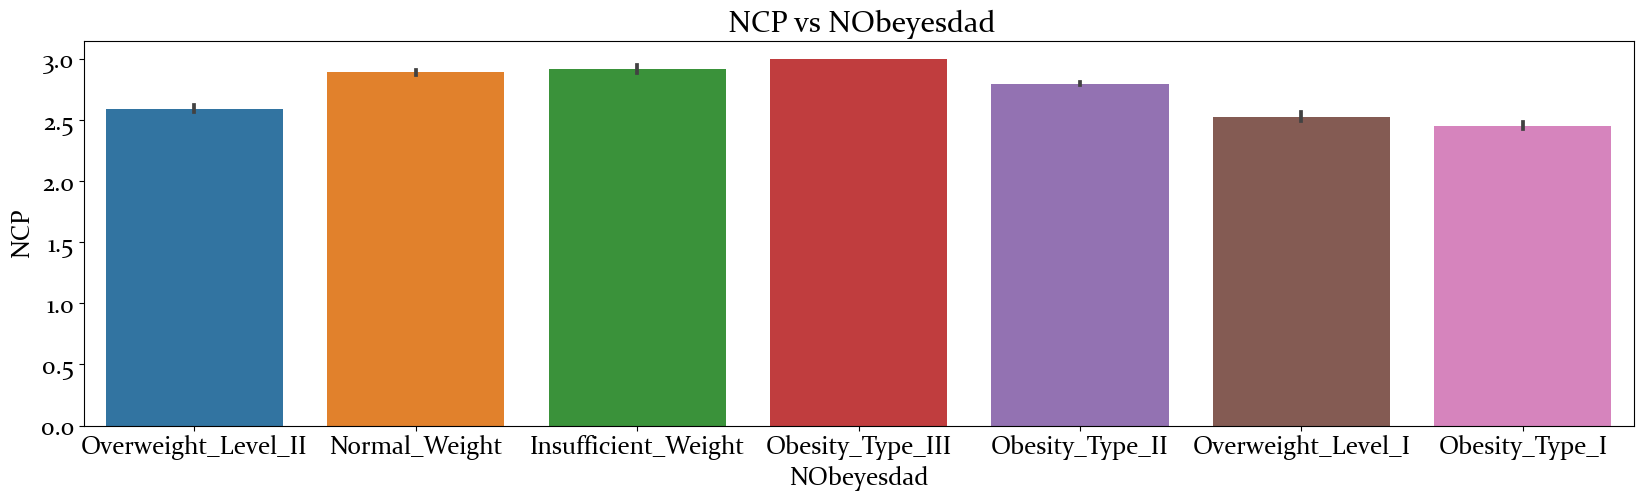

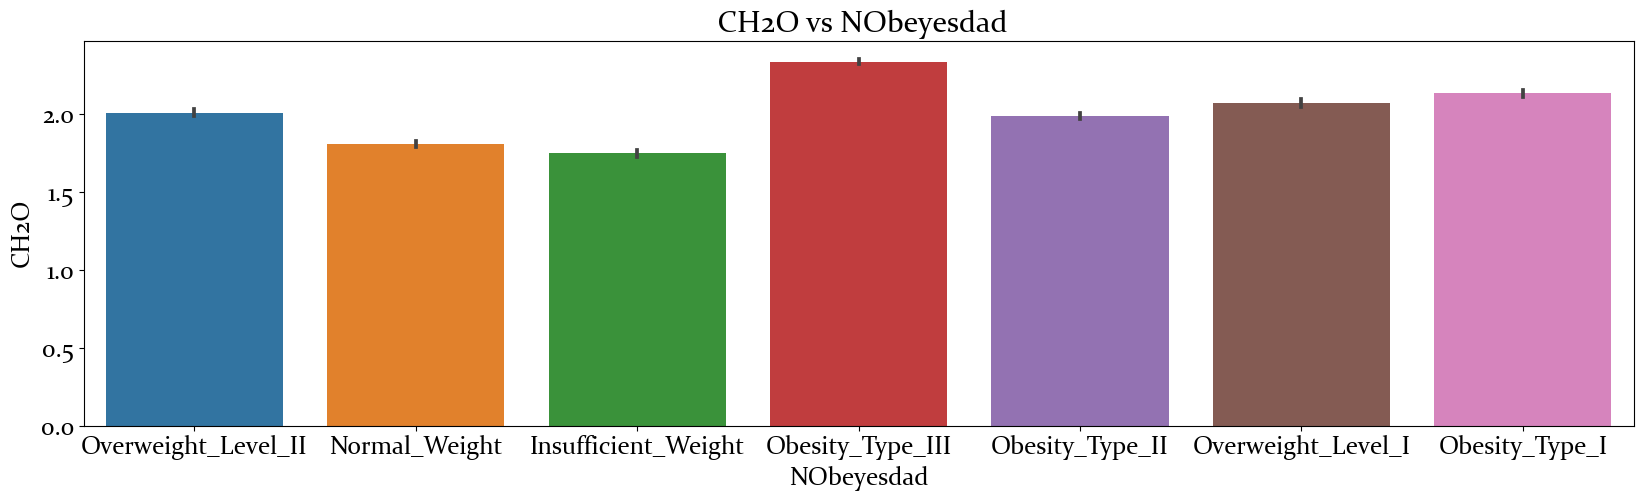

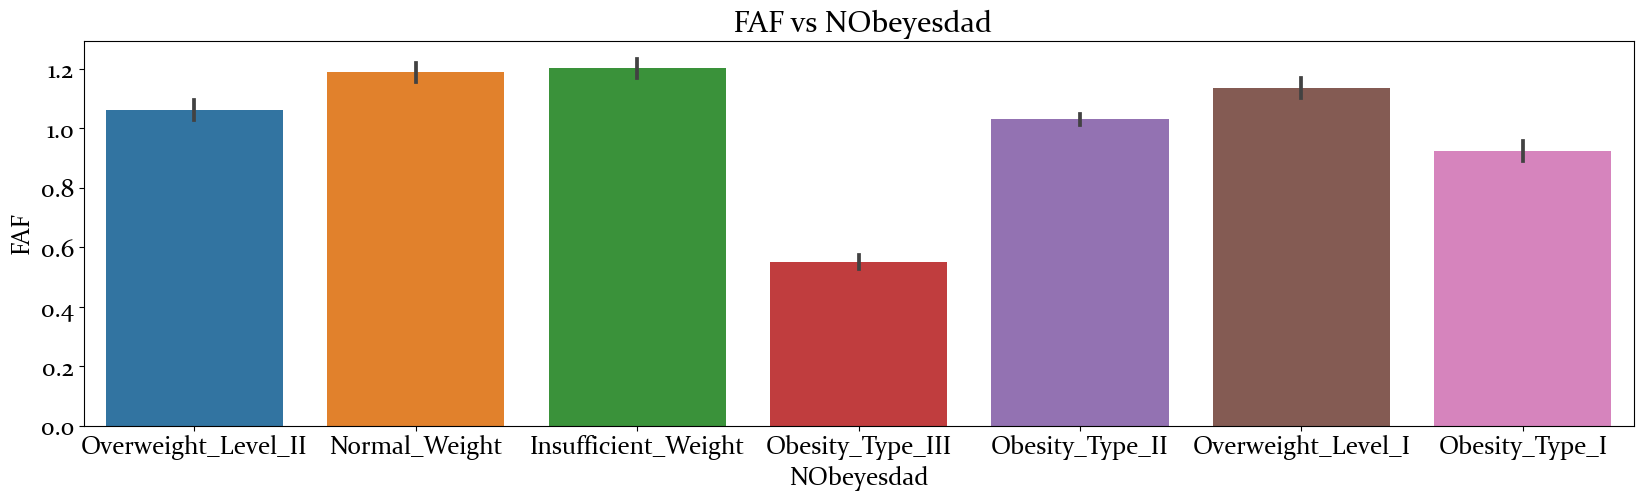

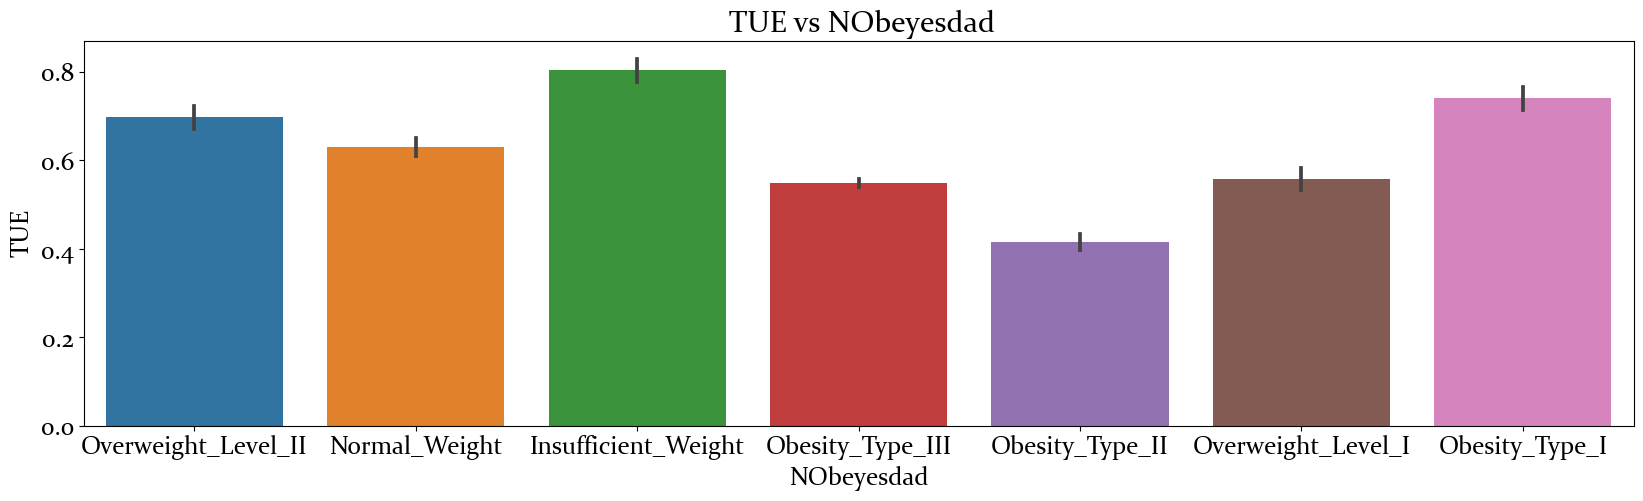

In [10]:
for var in numerical:
    plt.figure(figsize=(20,5))
    fig = sns.barplot(x = target, y = var, data = train)
    fig.set_title(f' {var} vs NObeyesdad')
    plt.show()

Though the above graphs are meaningful, it is still a bit hard to deduce some kind of insight from a barplot. We can also draw a violinplot to have a much better and clear insight on the relationship between numerical columns and the target variable

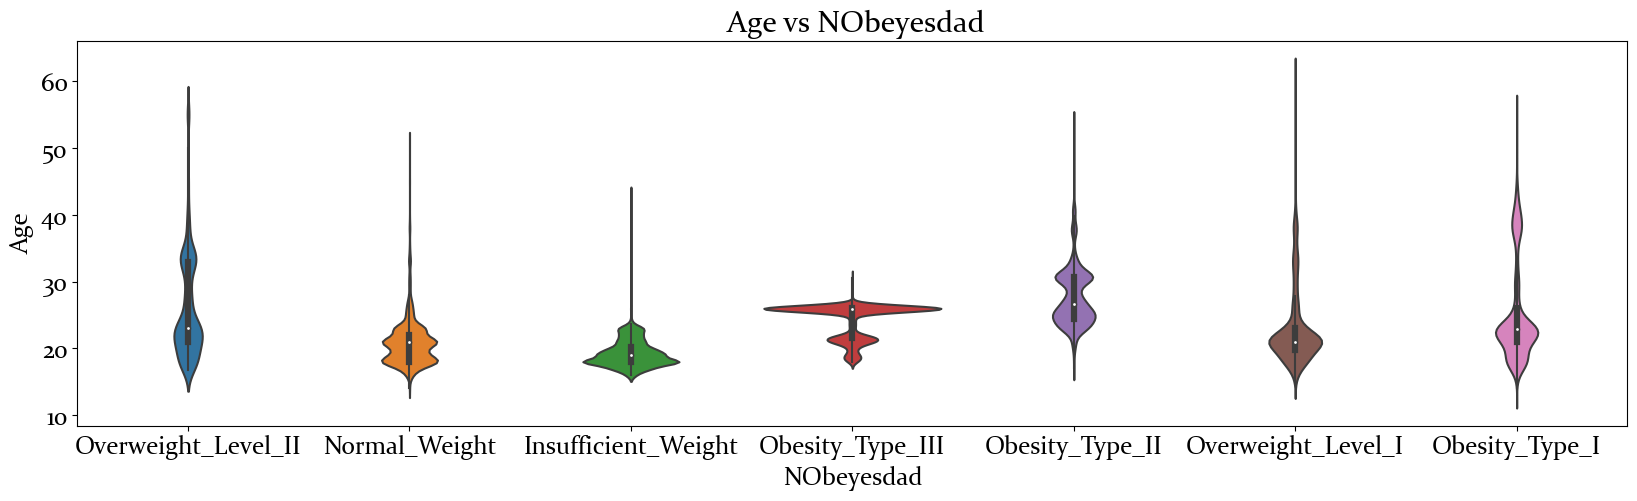

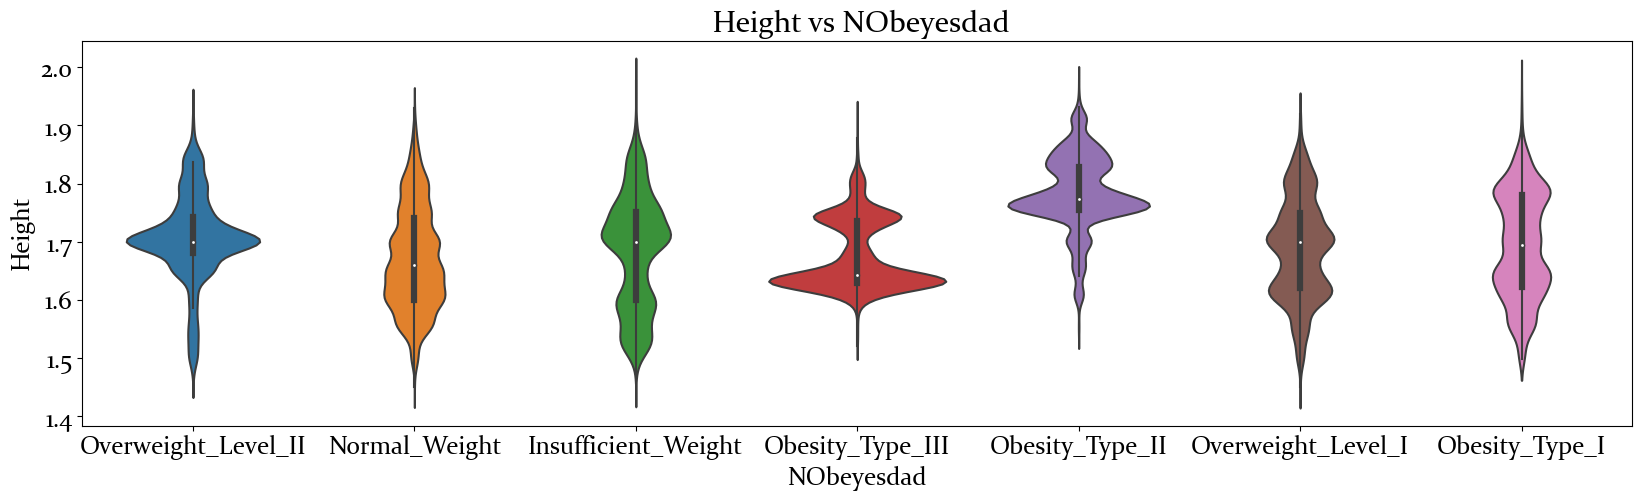

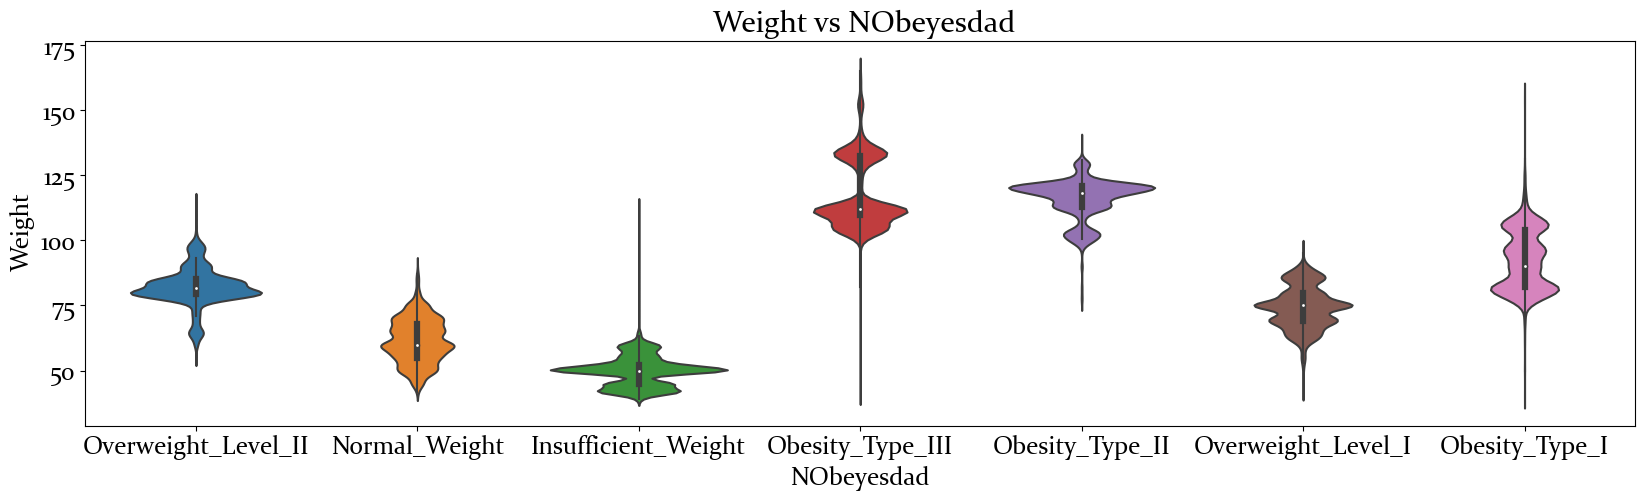

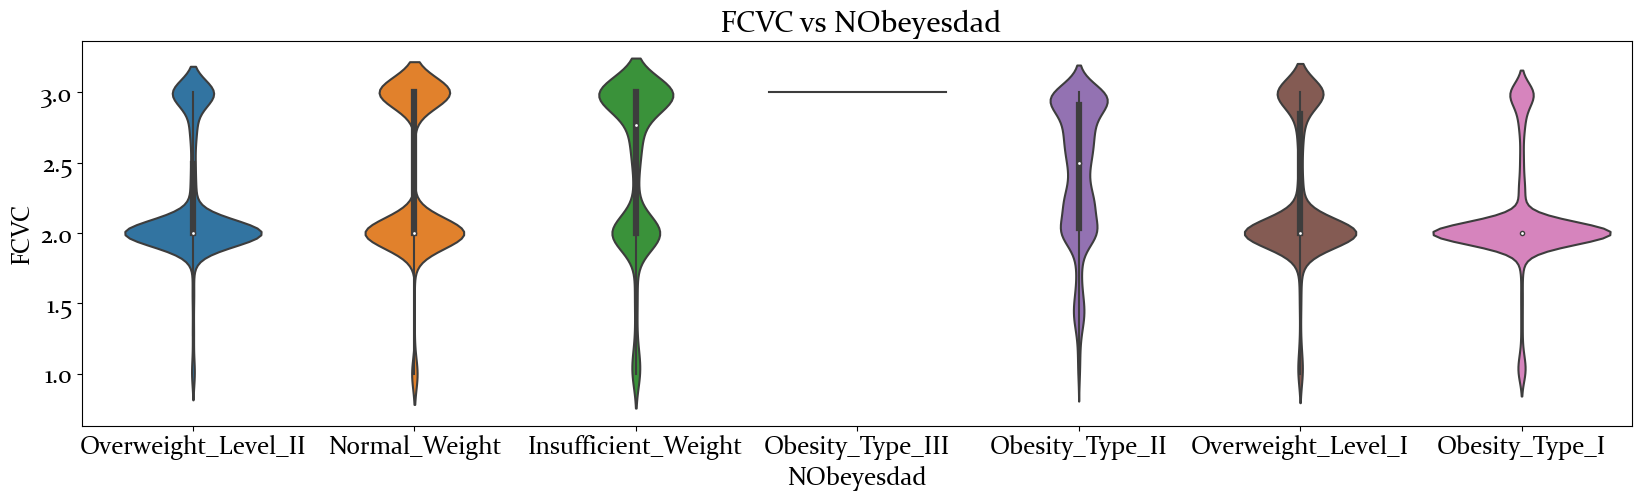

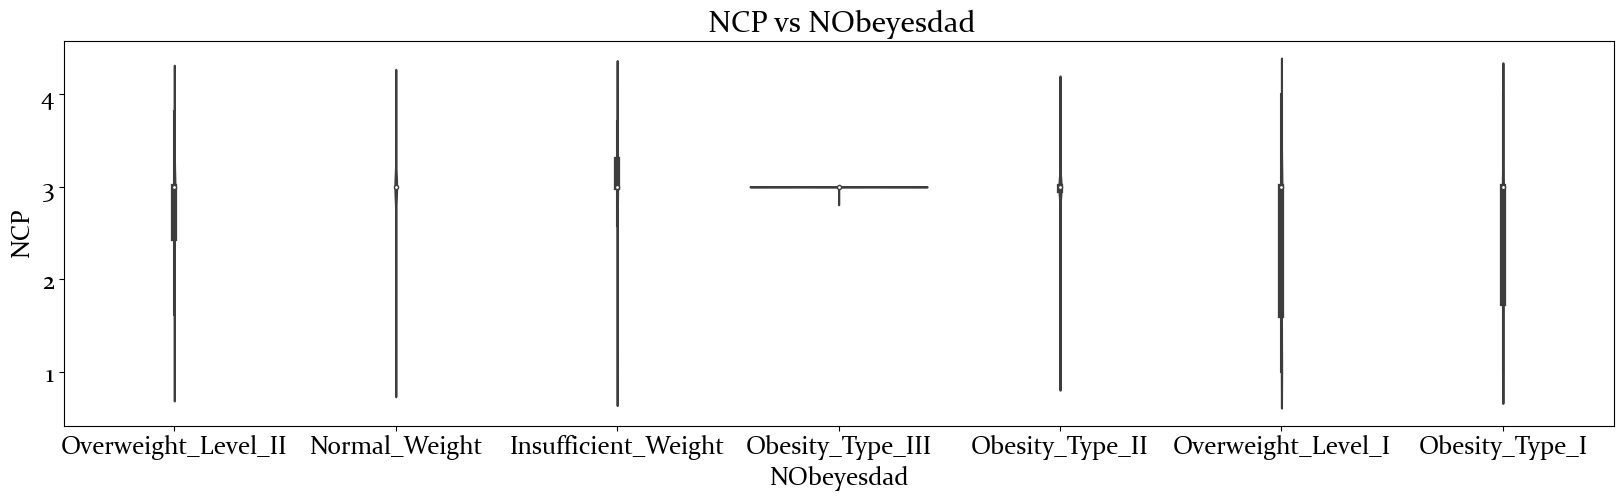

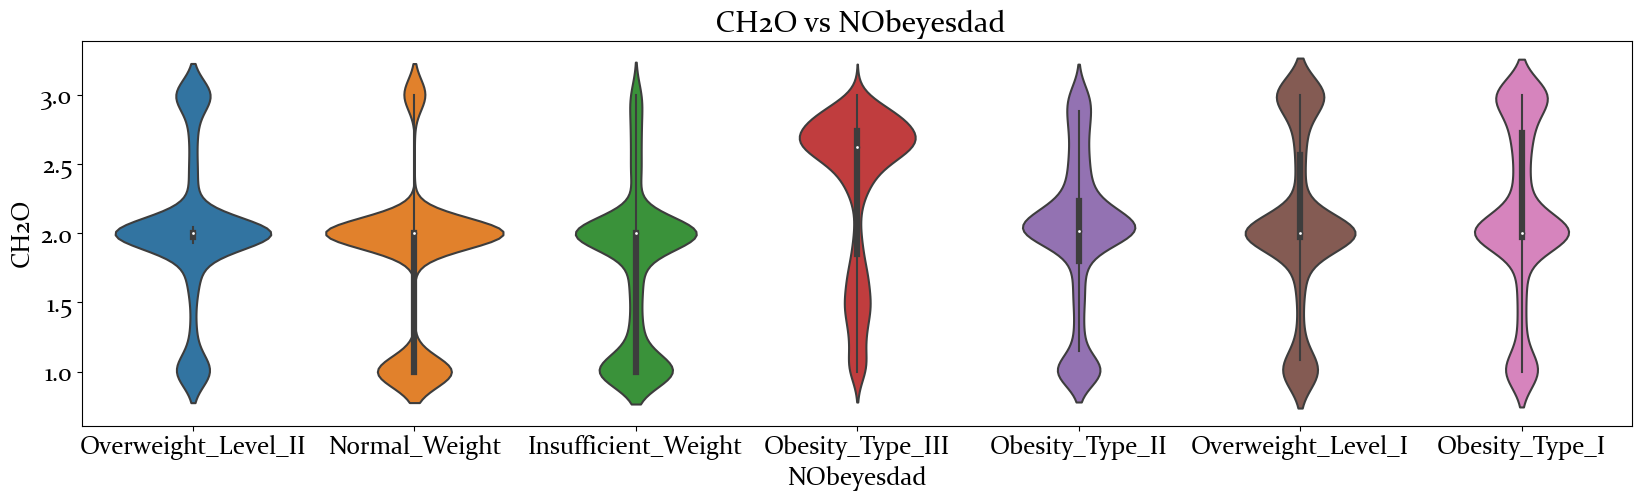

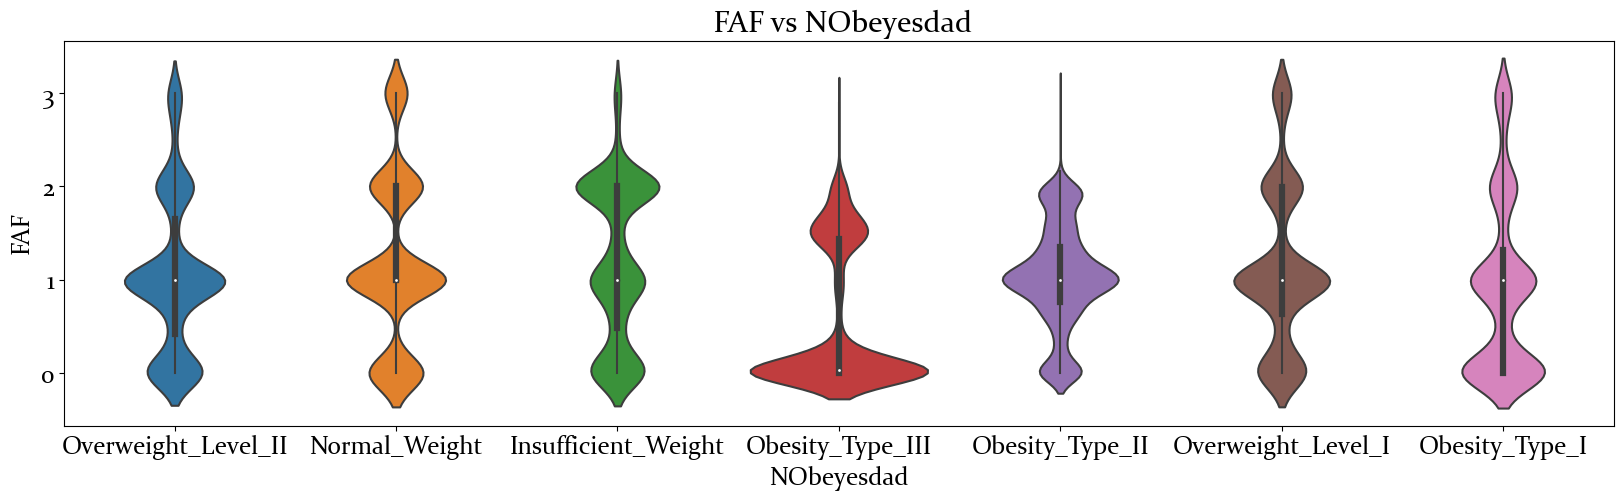

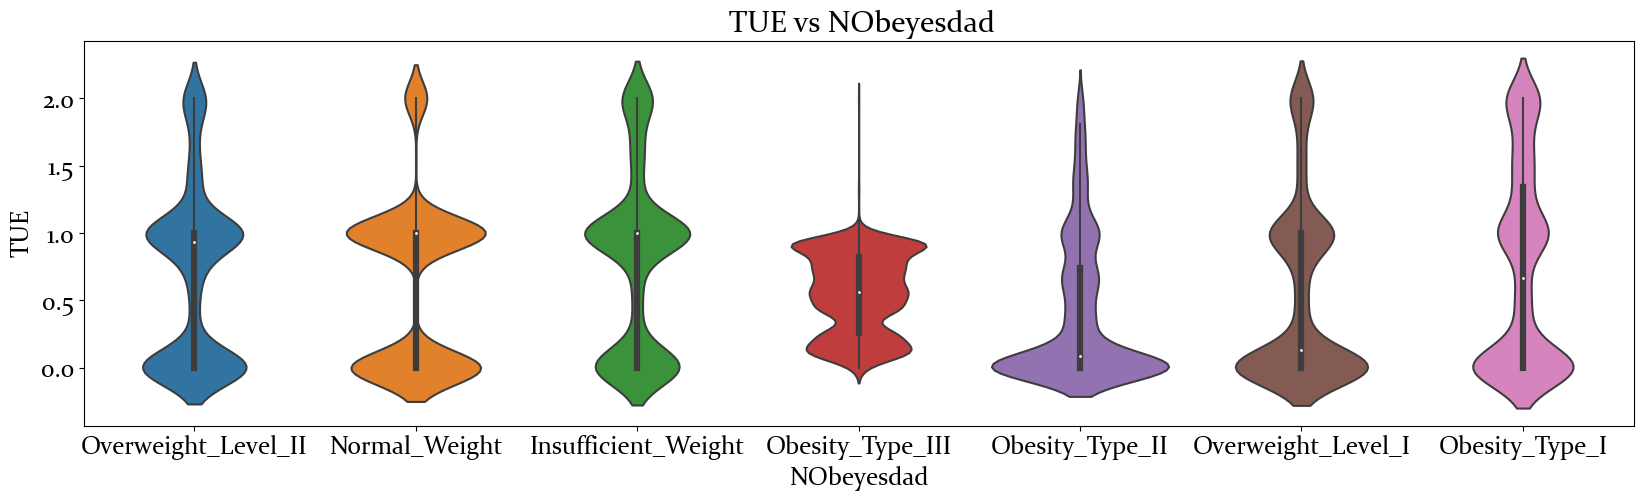

In [11]:
for var in numerical:
    plt.figure(figsize=(20,5))
    fig = sns.violinplot(x = target, y = var, data = train)
    fig.set_title(f' {var} vs NObeyesdad')
    plt.show()

It would appear from the data that the higher obesity type I II and II, the age is below 40 and 1 significant 
observation is that the Obesity III is highly prelevant between the ages 20-30.

Though Height cannot give a significant relationship conclusion, Weight can provide a key insight showing a strong
relation between types I II and III. It is almost certain to say that people over the weight of 100 kgs fall into
any of the 3 types

The most important which we can see if for the FCVC(Consumption of Vegetables), which is almost none for the Obesity III.

It is also clear that the person with Obesity type III, has 3 complete meals everyday

Physical activity frequency (FAF) - another key insight involving FAF is that the Obesity type III, much of the
data is spread in the 0 range, which means there is almost no physical activity for that target category

Categorical - target

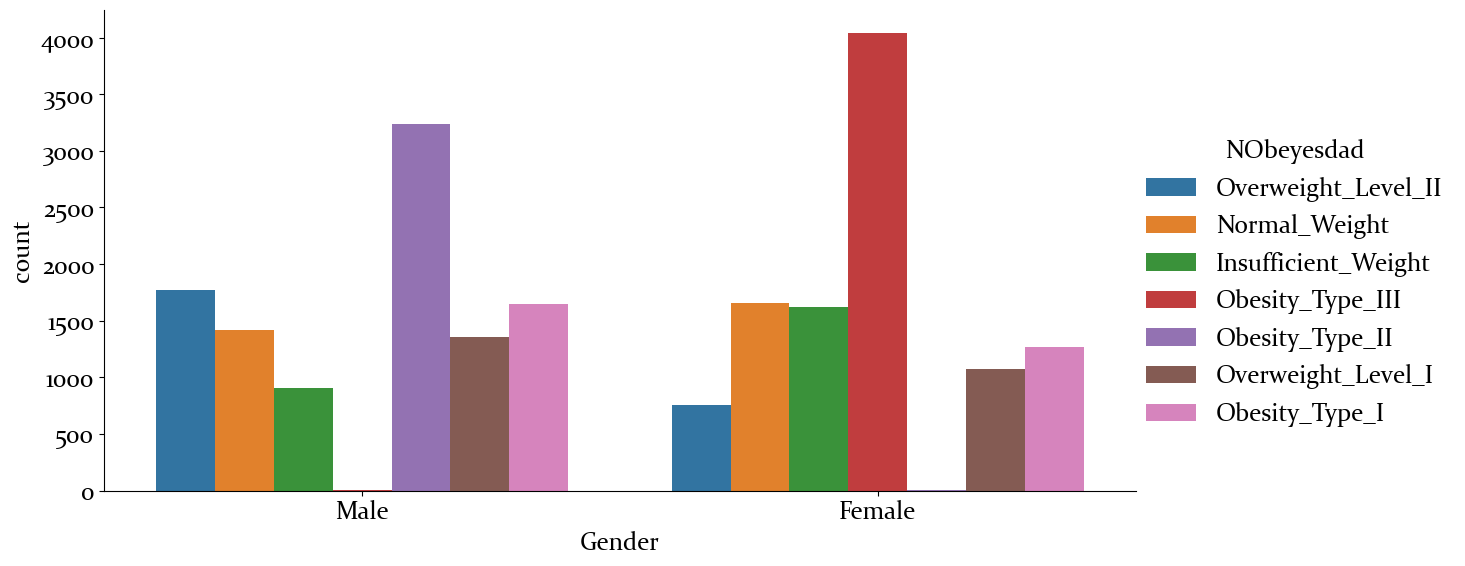

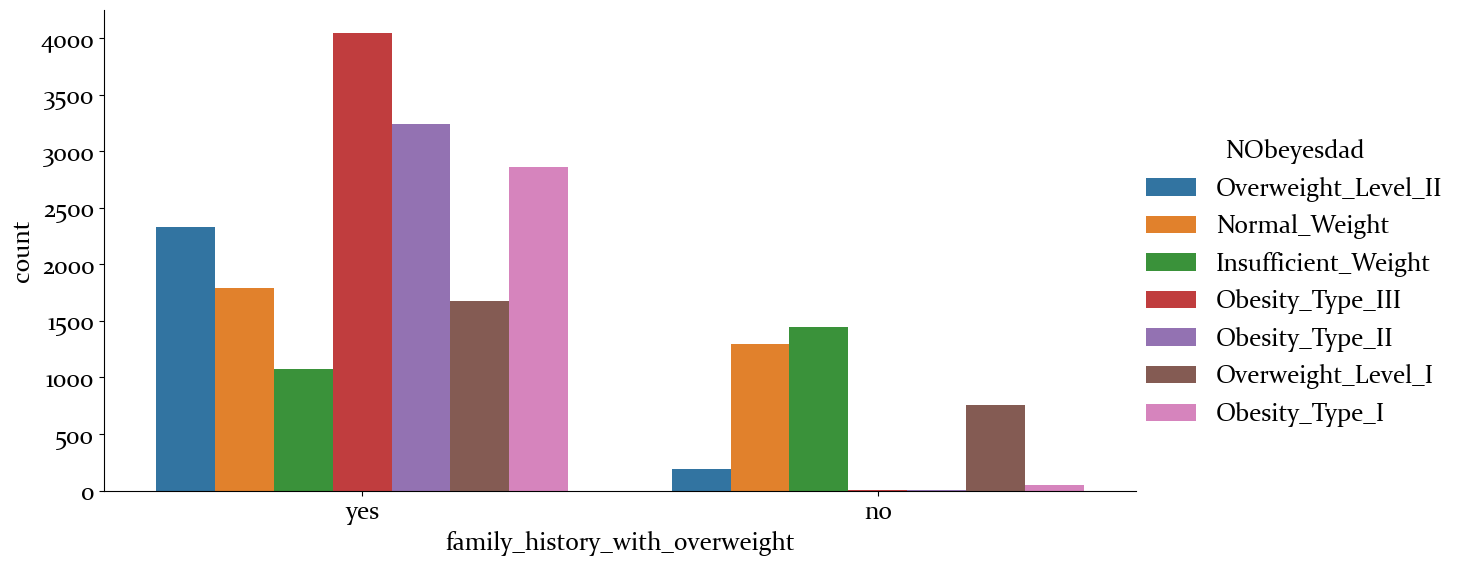

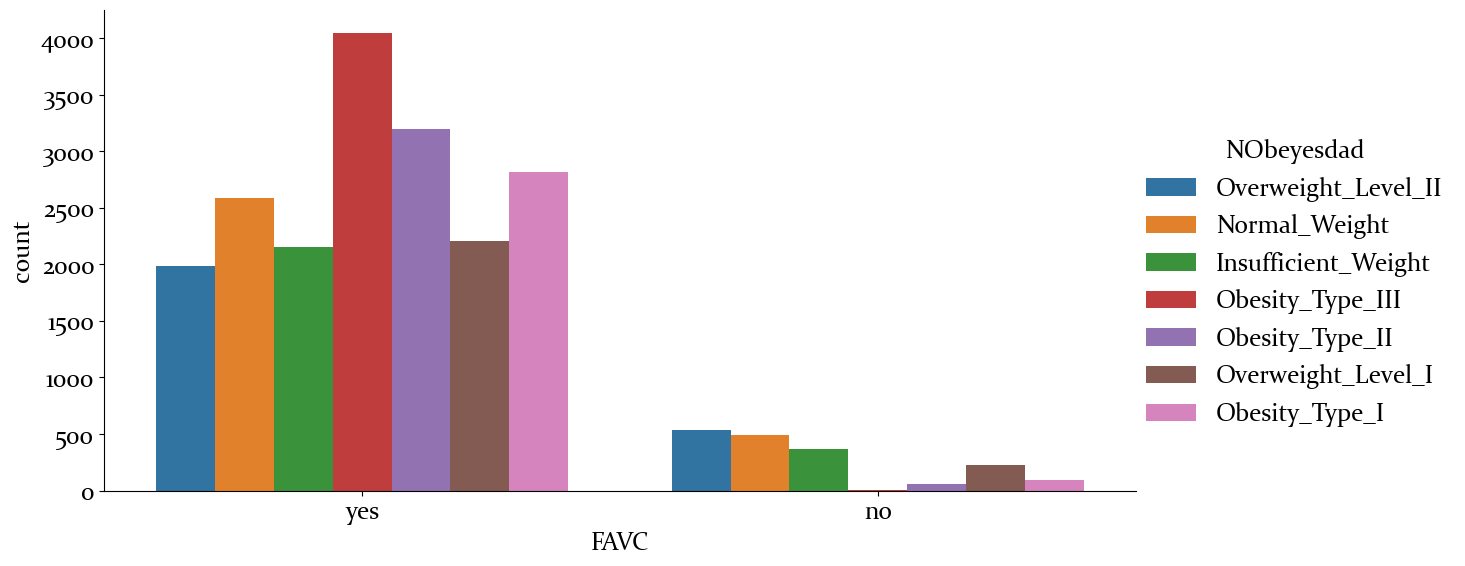

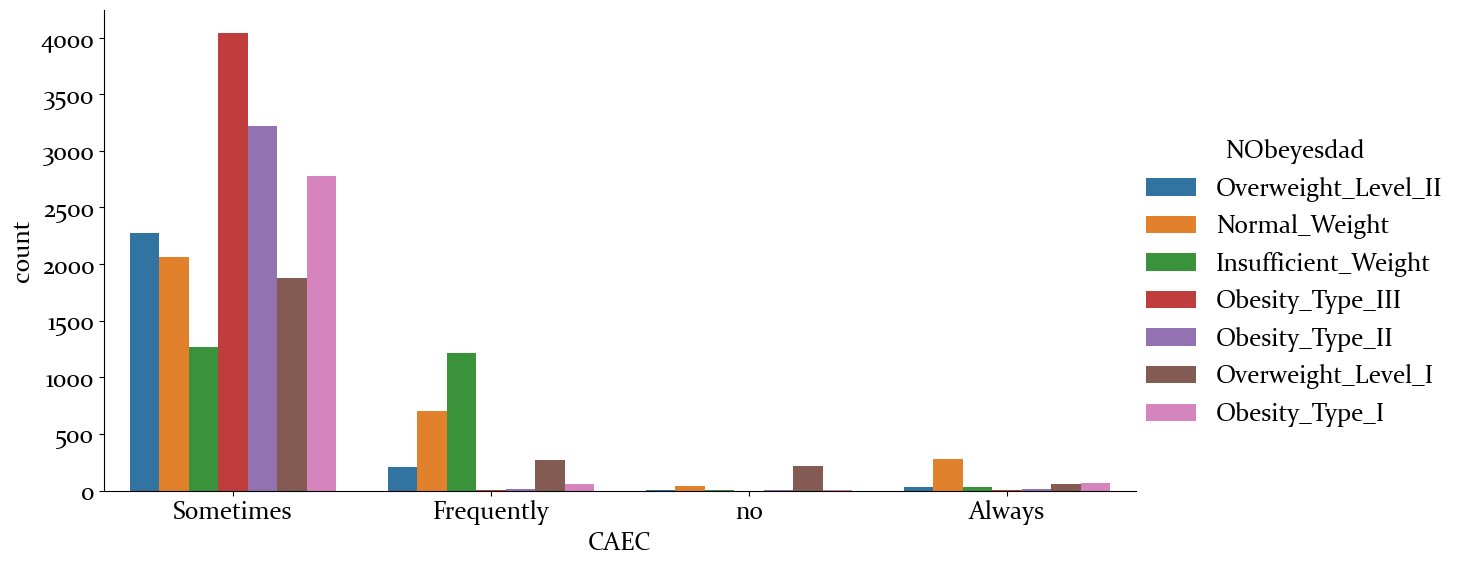

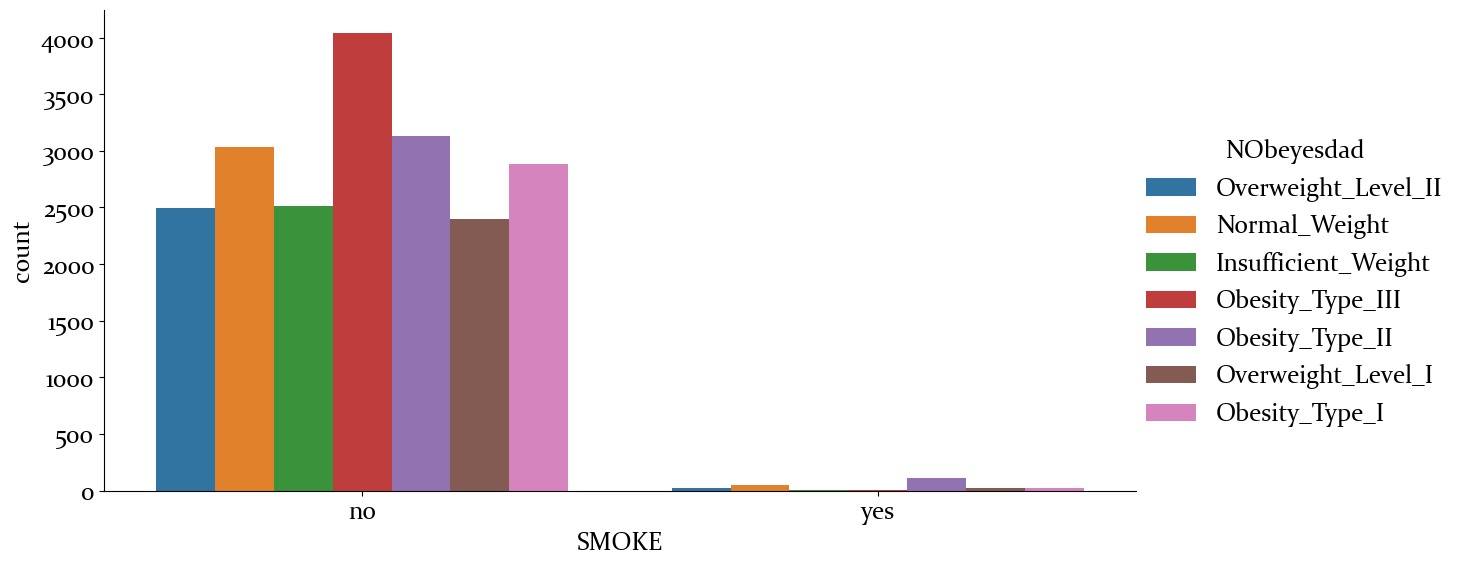

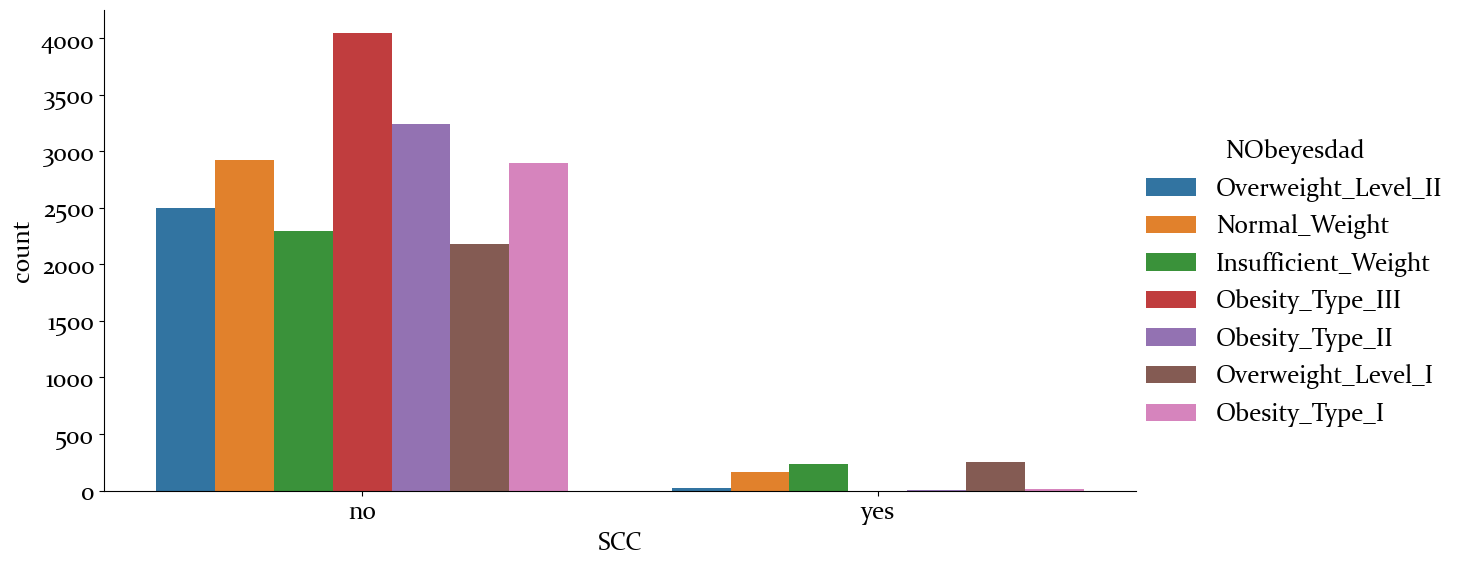

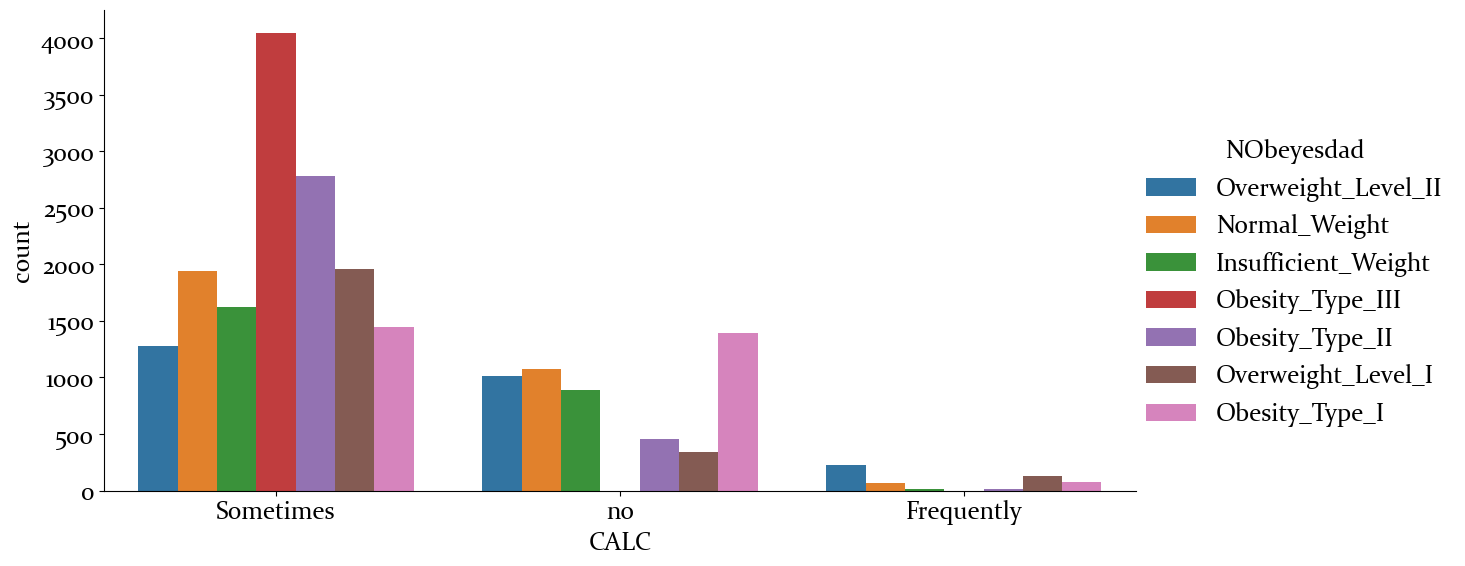

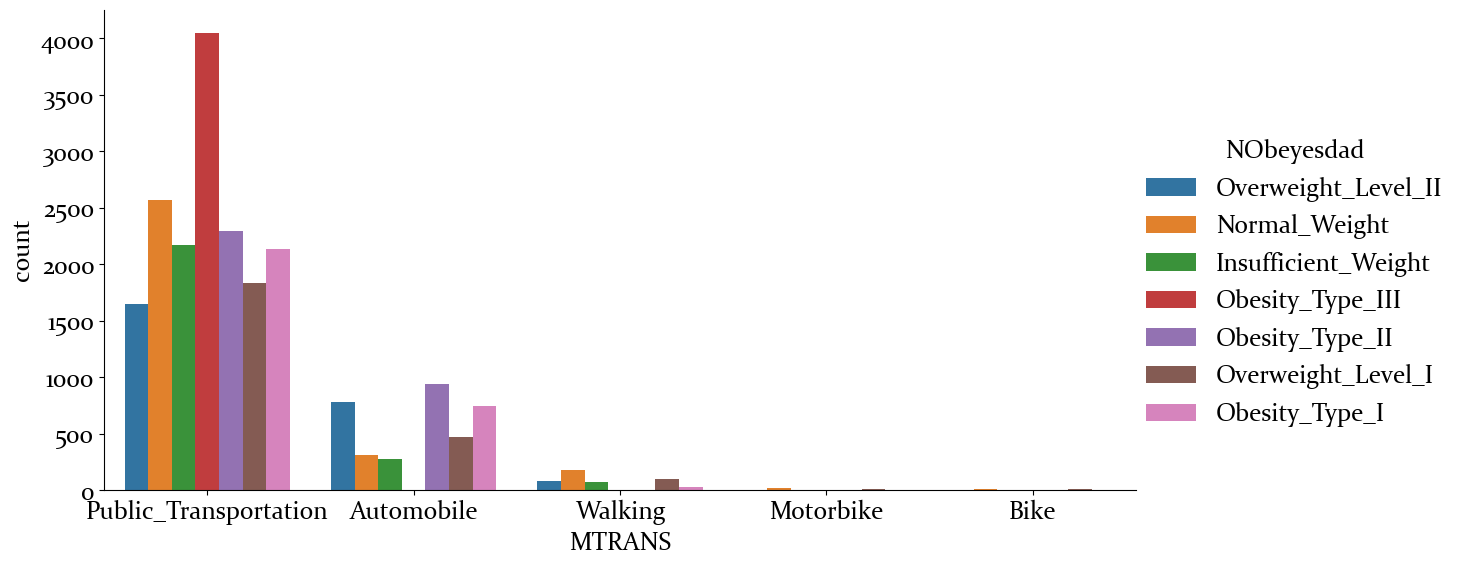

In [12]:
for var in categorical:
    fig = sns.catplot(data=train, x=var, hue="NObeyesdad", kind="count",height=6, aspect=2)

In [13]:
train[train['NObeyesdad'] == 'Obesity_Type_III']['Gender'].value_counts(normalize=True)

Female    0.998764
Male      0.001236
Name: Gender, dtype: float64

Key Insights

Obesity type II is highly prevelant in Males and and type III in females with 98% of Obesity III cases in Females

Family history and FAVC also has a strong correlation with NObeyesdad.

By the looks of Smoke graph, it seems that Smoking doesnt have any affect of getting obese.

SCC - Calorific monitoring can help with Obesity prevention, with people who monitor calorific intake having significantly less cases of diabetes

People who travel on Public Transportation have significantly higher number Obseity cases.This may have to examined further as not all correlation displays causality

 





Feature Engineering

Binning

In [14]:
def map_feature(value):
    if value == 0:
        return "Never"
    elif 0 < value <= 2:
        return "Moderate"
    elif value > 2:
        return "Always"
    else:
        return None 

In [15]:
train['Physical_Activity'] = train['FAF'].apply(map_feature)
test['Physical_Activity'] = test['FAF'].apply(map_feature)
train['BMI'] = train['Weight']/np.square(train['Height'])
test['BMI'] = test['Weight']/np.square(test['Height'])

In [16]:
train['Physical_Activity'].value_counts()

Moderate    14424
Never        5044
Always       1290
Name: Physical_Activity, dtype: int64

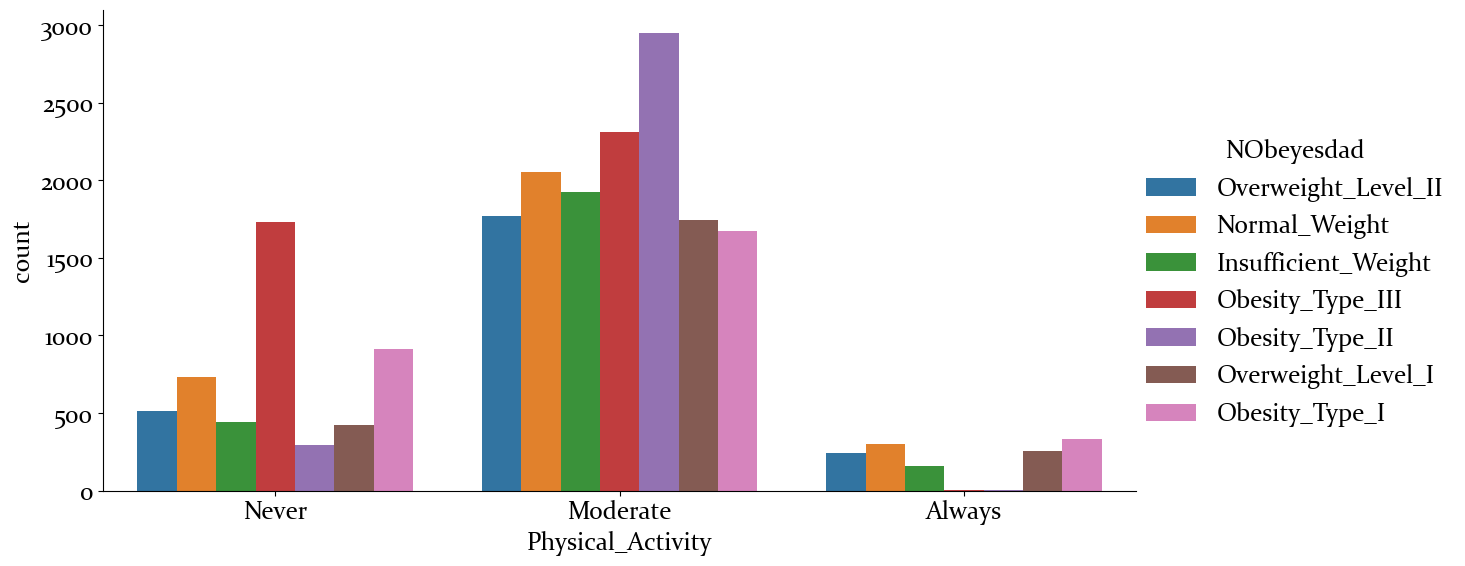

In [17]:
fig = sns.catplot(data=train, x='Physical_Activity', hue="NObeyesdad", kind="count",height=6, aspect=2)

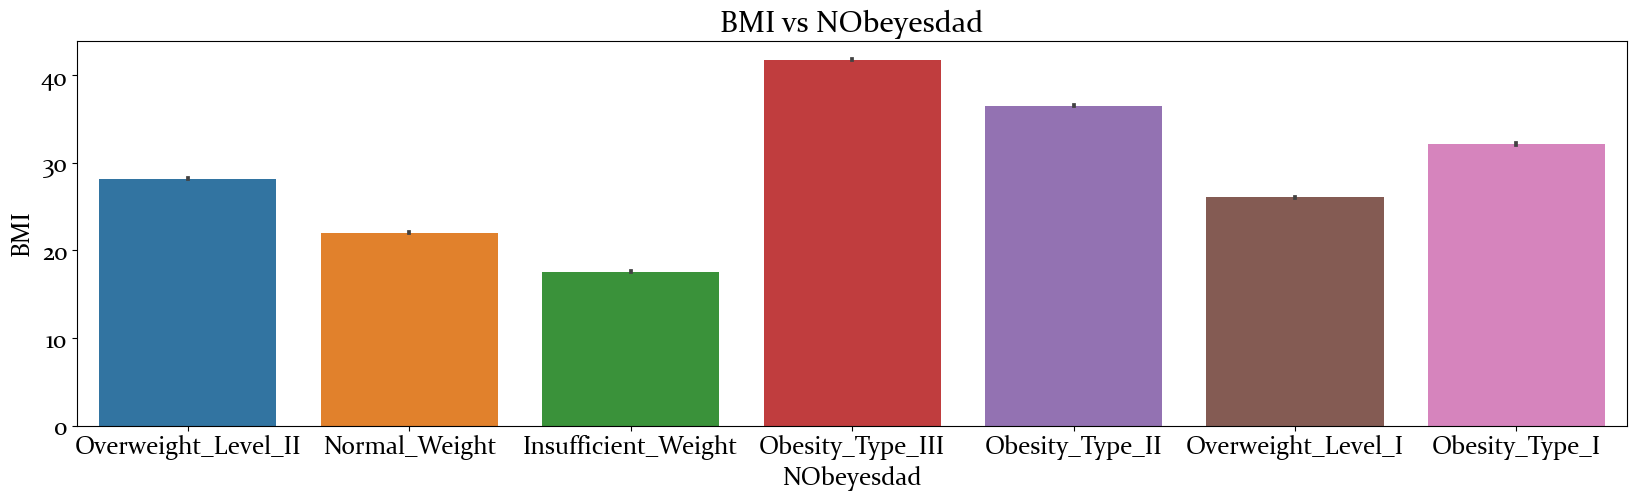

In [18]:
plt.figure(figsize=(20,5))
fig = sns.barplot(x = target, y = 'BMI', data = train)
fig.set_title('BMI vs NObeyesdad')
plt.show()

Data preprocessing Pipeline

Null Value imputation

In [19]:
train.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
Physical_Activity                 0
BMI                               0
dtype: int64

In [20]:
test.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
Physical_Activity                 0
BMI                               0
dtype: int64

There are no null values, so we can proceed with the next steps

Categorical Encoding

In [21]:
data = pd.concat([train,test],axis=0)
train = data.iloc[:len(train)]
test = data.iloc[len(train):]

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

encoder = OneHotEncoder(
    categories="auto",
    drop="first", 
    sparse_output=False,
    handle_unknown="error", 
)


scaler = StandardScaler().set_output(transform="pandas")

ct = ColumnTransformer(
    [("encoded", encoder, ["Gender", "family_history_with_overweight", "FAVC","SMOKE","SCC","MTRANS"]),
    ("scaled", scaler, ['Age', 'Height','Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE','BMI'])],remainder='passthrough',
)

ct.set_output(transform="pandas")

train = ct.fit_transform(train)
test = ct.transform(test)

In [23]:
import re
train.rename(columns=lambda x: re.sub('encoded__','',x), inplace=True)
test.rename(columns=lambda x: re.sub('encoded__','',x), inplace=True)
train.rename(columns=lambda x: re.sub('scaled__','',x), inplace=True)
test.rename(columns=lambda x: re.sub('scaled__','',x), inplace=True)
train.rename(columns=lambda x: re.sub('remainder__','',x), inplace=True)
test.rename(columns=lambda x: re.sub('remainder__','',x), inplace=True)

In [24]:
train.head()

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Age,...,FCVC,NCP,CH2O,FAF,TUE,BMI,CAEC,CALC,NObeyesdad,Physical_Activity
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.105699,...,-0.836279,0.314684,1.206594,-1.171141,0.597438,-0.237862,Sometimes,Sometimes,Overweight_Level_II,Never
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.027052,...,-0.836279,0.338364,-0.048349,0.021775,0.636513,-0.818331,Frequently,no,Normal_Weight,Moderate
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.027052,...,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,-1.573741,Sometimes,no,Insufficient_Weight,Moderate
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.507929,...,1.039171,0.338364,-0.584035,0.579896,0.271455,1.753591,Sometimes,Sometimes,Obesity_Type_III,Moderate
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.371197,...,0.438397,-1.119801,-0.081469,1.176486,0.523111,-0.557096,Sometimes,Sometimes,Overweight_Level_II,Moderate


In [25]:
train['CAEC'] = train['CAEC'].map({"no":0,"Sometimes":1,"Frequently":2,"Always":3})
test['CAEC'] = test['CAEC'].map({"no":0,"Sometimes":1,"Frequently":2,"Always":3})

train['CALC'] = train['CALC'].map({"no":0,"Sometimes":1,"Frequently":2,"Always":3})
test['CALC'] = test['CALC'].map({"no":0,"Sometimes":1,"Frequently":2,"Always":3})

train['Physical_Activity'] = train['Physical_Activity'].map({"Never":0,"Moderate":1,"Always":3})
test['Physical_Activity'] = test['Physical_Activity'].map({"Never":0,"Moderate":1,"Always":3})

In [26]:
train.columns

Index(['Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'SMOKE_yes', 'SCC_yes', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Age', 'Height',
       'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI', 'CAEC', 'CALC',
       'NObeyesdad', 'Physical_Activity'],
      dtype='object')

In [27]:
test.drop('NObeyesdad',axis=1,inplace=True)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = train.drop('NObeyesdad',axis=1)
y = train['NObeyesdad']

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [31]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42,stratify = y)

In [32]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((16606, 21), (4152, 21), (16606,), (4152,))

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
vals = lr.predict(X_val)
accuracy_score(y_val,vals)

0.8631984585741811

In [37]:
preds = lr.predict(test)

In [38]:
sample_submission_df = pd.read_csv('data/sample_submission.csv')
sample_submission_df['NObeyesdad'] = preds
sample_submission_df.to_csv('data/submission1_LR_baseline.csv', index=False)
sample_submission_df.head()

,id,NObeyesdad
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4


In [39]:
# the objective function takes the hyperparameter space
# as input

def objective(trial):     
    gbm_n_estimators = trial.suggest_int("gbm_n_estimators", 100, 1000)
    gbm_max_depth = trial.suggest_int("gbm_max_depth", 1, 4)
    gbm_min_samples_split = trial.suggest_float("gbm_min_samples_split", 0.01, 1)

    model = GradientBoostingClassifier(
        n_estimators=gbm_n_estimators,
        max_depth=gbm_max_depth,
        min_samples_split=gbm_min_samples_split
    )

    
    score = cross_val_score(model, X_train, y_train, cv=5)
    accuracy = score.mean()
    
    return accuracy

In [40]:
study = optuna.create_study(
    direction="maximize",
    # we do not need the below line, 
    # tpe is the default search
    sampler=optuna.samplers.TPESampler(),
)


study.optimize(objective, n_trials=10)

[I 2024-02-26 16:49:51,660] A new study created in memory with name: no-name-e298142b-76ec-4007-a965-43824e4e30f4
[I 2024-02-26 17:04:41,476] Trial 0 finished with value: 0.900638448955899 and parameters: {'gbm_n_estimators': 491, 'gbm_max_depth': 4, 'gbm_min_samples_split': 0.4941482196125837}. Best is trial 0 with value: 0.900638448955899.
[I 2024-02-26 17:13:50,595] Trial 1 finished with value: 0.8979887353224993 and parameters: {'gbm_n_estimators': 695, 'gbm_max_depth': 4, 'gbm_min_samples_split': 0.9881328183614704}. Best is trial 0 with value: 0.900638448955899.
[I 2024-02-26 17:29:29,922] Trial 2 finished with value: 0.8963025506233387 and parameters: {'gbm_n_estimators': 786, 'gbm_max_depth': 4, 'gbm_min_samples_split': 0.7778936654499493}. Best is trial 0 with value: 0.900638448955899.
[I 2024-02-26 17:32:45,530] Trial 3 finished with value: 0.8899194388291465 and parameters: {'gbm_n_estimators': 269, 'gbm_max_depth': 1, 'gbm_min_samples_split': 0.7883775674890796}. Best is tr

In [45]:
gbc_params = study.best_params

In [49]:
gbc = GradientBoostingClassifier(n_estimators=920,
        max_depth=3,
        min_samples_split=0.5175)

In [51]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(min_samples_split=0.5175, n_estimators=920)

In [52]:
preds_gbc = gbc.predict(test)

In [54]:
sample_submission_df = pd.read_csv('data/sample_submission.csv')
sample_submission_df['NObeyesdad'] = labelencoder.inverse_transform(preds)
sample_submission_df.to_csv('data/submission2_GBMClassifier.csv', index=False)
sample_submission_df.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
